<a href="https://colab.research.google.com/github/Khawla0102/Resporty-Hub/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Q1 - Regression

In [7]:
#load "home_data.csv"
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/home_data.csv"

import pandas as pd
df = pd.read_csv(path)

print("Loaded successfully:", df.shape)
df.head()


Mounted at /content/drive
Loaded successfully: (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


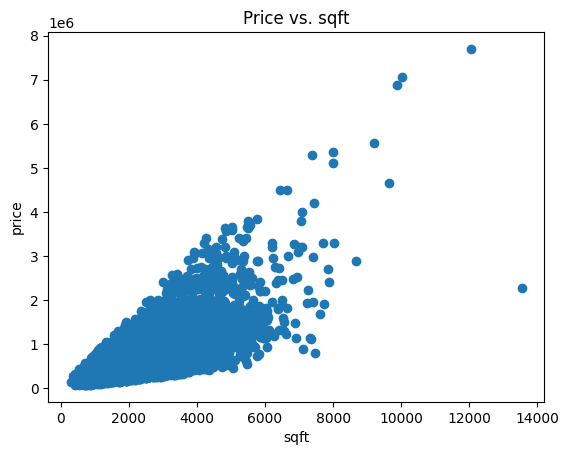

In [8]:
import matplotlib.pyplot as plt

# Summary statistics
display(df.describe())
#Scatter plot of sqft_living vs price
plt.figure()
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('sqft');
plt.ylabel('price');
plt.title('Price vs. sqft')
plt.show()

## 2) Gradient Descent (Normalized)
Initialize $w_0, w_1 = 0$, use learning rate $\eta=0.01$, iterate until convergence or 10,000 iterations, and minimize RSS.

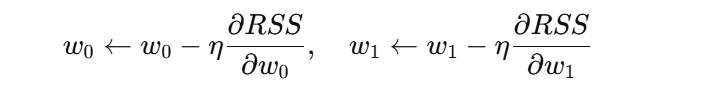

Converged at iter 854, J=68351287053.6991
Gradient Descent: w0=540088.125, w1=257730.189558, iters=855


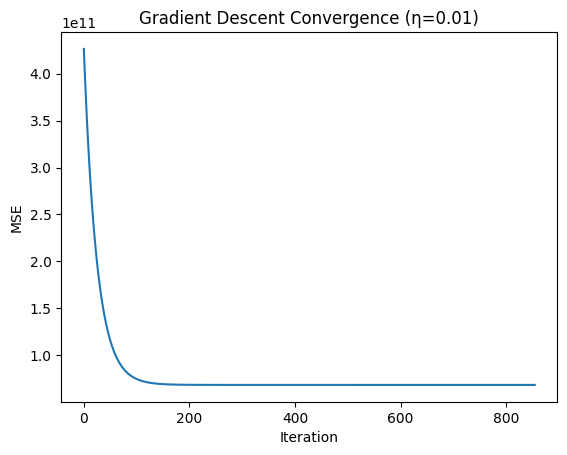

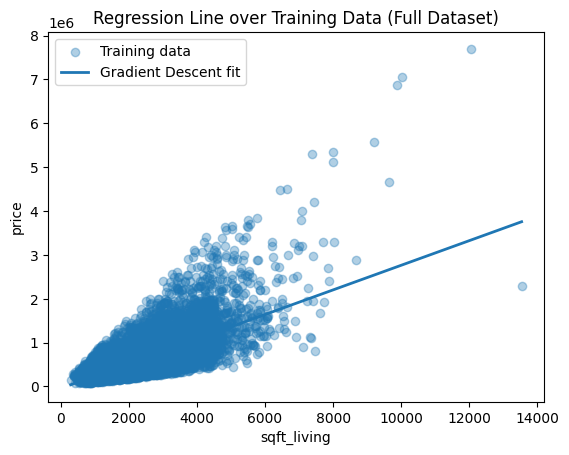

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the feature (x) and target (y) columns
x = df['sqft_living'].astype(float).values
y = df['price'].astype(float).values

# Normalize input feature to prevent numerical overflow and speed up convergence
x_mean, x_std = x.mean(), x.std() # mean & standard deviation of x
x_n = (x - x_mean) / x_std # Normalize x to have mean = 0 and std = 1

# model parameters
w0, w1 = 0.0, 0.0
rate = 0.01
Iteration = 10_000
tolerance = 1e-8
cost_history = []

# Gradient Descent Loop
for t in range(Iteration):
    y_pred = w0 + w1 * x_n
    residuals = y_pred - y # Difference between prediction and actual(Error)

# Compute partial derivatives
    dw0 = 2 * residuals.mean()
    dw1 = 2 * (x_n * residuals).mean()

    w0 -= rate * dw0
    w1 -= rate * dw1

# Compute Mean Squared Error (proportional to RSS)
    J = (residuals ** 2).mean()
    cost_history.append(J)

 # Check for convergence--> if cost improvement is smaller than tolerance, stop
    if t > 0 and abs(cost_history[-2] - cost_history[-1]) < tolerance:
        print(f"Converged at iter {t}, J={J:.4f}")
        break

# Final results after training
print(f"Gradient Descent: w0={w0:.3f}, w1={w1:.6f}, iters={len(cost_history)}")

# Convergence plot
plt.figure()
plt.plot(cost_history) # Plot cost (MSE) vs iteration
plt.xlabel("Iteration"); plt.ylabel("MSE")
plt.title("Gradient Descent Convergence (η=0.01)")
plt.show()

# Regression Line over Training Data
plt.figure()
plt.scatter(x, y, alpha=0.35, label="Training data")

# Generate smooth line points for visualization
xx = np.linspace(x.min(), x.max(), 200)
yy = w0 + w1 * ((xx - x_mean) / x_std)
# Regression line
plt.plot(xx, yy, linewidth=2, label="Gradient Descent fit")
plt.xlabel("sqft_living"); plt.ylabel("price")
plt.title("Regression Line over Training Data (Full Dataset)")
plt.legend(); plt.show()

In [ ]:
## Convergence Plot
## After around 800 iterations, the curve flattens, indicating that convergence has been reached
## This behavior confirms that the chosen learning rate (η = 0.01) is appropriate
## Gradient Descent successfully minimized the cost function,finding weights close to the least-squares solution.


## Regression Line Fit
## The line indicates that larger houses tend to have higher prices.
## The regression line confirms that Gradient Descent found a stable global minimum and a reliable linear model for prediction.

## 3) Compare with Closed-Form Least Squares (on normalized x)


In [10]:
# Design matrix using normalized x
Xn = np.column_stack([np.ones_like(x_n), x_n])
theta = np.linalg.pinv(Xn.T @ Xn) @ (Xn.T @ y)  # pinv for numerical stability
intercept_closed, slope_closed = theta

print(f"Closed-form (normalized x): w0 = {intercept_closed:.3f}, w1 = {slope_closed:.6f}")
print(f"Gradient Descent:           w0 = {w0:.3f}, w1 = {w1:.6f}")
print(f"Δw0 = {abs(w0 - intercept_closed):.6f},  Δw1 = {abs(w1 - slope_closed):.6f}")

# RMSE comparison
y_pred_gd = w0 + w1 * x_n
y_pred_closed = intercept_closed + slope_closed * x_n
rmse_gd = np.sqrt(np.mean((y - y_pred_gd)**2))
rmse_closed = np.sqrt(np.mean((y - y_pred_closed)**2))
print(f"RMSE: {rmse_gd:.2f},  RMSE (Closed-form): {rmse_closed:.2f}")

Closed-form (normalized x): w0 = 540088.142, w1 = 257730.197676
Gradient Descent:           w0 = 540088.125, w1 = 257730.189558
Δw0 = 0.017012,  Δw1 = 0.008118
RMSE: 261440.79,  RMSE (Closed-form): 261440.79


##Visualize the cost function surface in 3D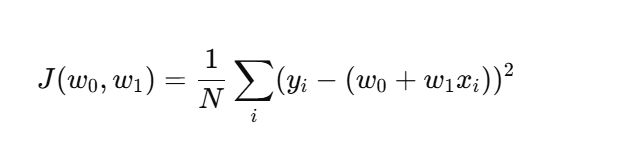

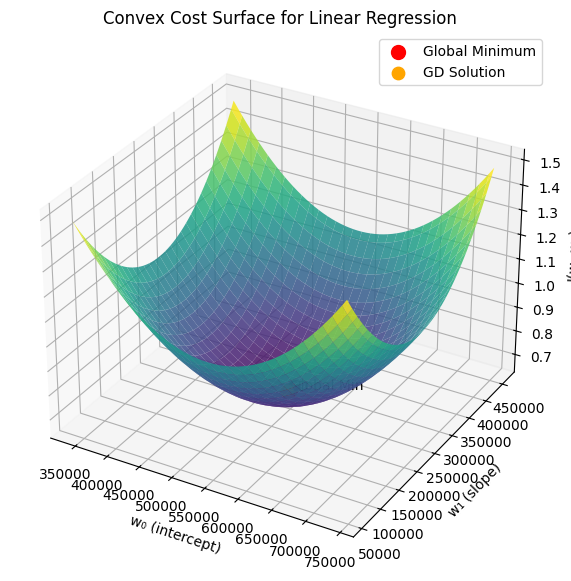

In [27]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Pick ranges around the learned parameters
intercept_range = np.linspace(w0 - 200000, w0 + 200000, 60)
slope_range = np.linspace(w1 - 200000, w1 + 200000, 60)

# Cost function J(w₀, w₁) for every combination of w₀ and w₁
J_cost_values = np.zeros((len(intercept_range), len(slope_range)))
for i, w0c in enumerate(intercept_range):
    for j, w1c in enumerate(slope_range):
        y_pred = w0c + w1c * x_n
        J_cost_values[i, j] = np.mean((y - y_pred)**2)

W0, W1 = np.meshgrid(intercept_range, slope_range)

#  true global minimum
min_i, min_j = np.unravel_index(np.argmin(J_cost_values), J_cost_values.shape)
w0_min = intercept_range[min_i]
w1_min = slope_range[min_j]
J_min  = J_cost_values[min_i, min_j]

# Cost at GD
J_gd = np.mean((y - (w0 + w1 * x_n))**2)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, J_cost_values.T, cmap='viridis', alpha=0.85)

# Grid's global minimum
ax.scatter(w0_min, w1_min, J_min + 0.02, color='red', s=100, label='Global Minimum', depthshade=False)

# Gradient Descent solution
ax.scatter(w0, w1, J_gd + 0.02, color='orange', s=80, label='GD Solution', depthshade=False)
ax.text(w0_min, w1_min, J_min + 0.05, "Global Min", color='black', fontsize=10)
ax.text(w0, w1, J_gd + 0.05, "GD", color='black', fontsize=10)

ax.set_xlabel("w₀ (intercept)")
ax.set_ylabel("w₁ (slope)")
ax.set_zlabel("J(w₀,w₁)")
ax.set_title("Convex Cost Surface for Linear Regression")
ax.legend()

plt.show()

In [ ]:
 ## The bowl shaped surface shows that the cost function is convex, meaning it has a single global minimum.
 ## The red point marks the true global minimum(obtained analytically using the closed-form least squares solution).
 ## The yellow point represents the solution found by Gradient Descent.
 ## The smooth curvature of the surface indicates that as parameters move away from the minimum, the error increases symmetrically.
 ## Because the surface is convex, Gradient Descent will always converge to the same global optimum.
 ## The visualization confirms that linear regression has a convex cost function, making optimization straightforward and reliable.

### Comparison of Parameters — Gradient Descent vs. Closed-Form Solution

After normalization and convergence:

\{Gradient Descent (GD)}:
\begin{cases}
\hat{w}_0^{(GD)} = 540{,}088.125 \\
\hat{w}_1^{(GD)} = 257{,}730.189558
\end{cases}



\{Closed-Form (Least Squares)}:
\begin{cases}
\hat{w}_0^{(LS)} = 540{,}088.142 \\
\hat{w}_1^{(LS)} = 257{,}730.197676
\end{cases}


**Difference:**


$$
\Delta w_0 = 0.017012, \quad \Delta w_1 = 0.008118
$$


**RMSE values:**
$$
\text{RMSE (GD)} = 261{,}440.79, \quad \text{RMSE (Closed-Form)} = 261{,}440.79
$$

The parameters are nearly identical --> the differences are smaller than 0.
This confirms that **Gradient Descent successfully reached the global minimum** of the convex cost surface. Because the cost function $$ J(w_0, w_1) $$ is convex, both methods converge to the same optimal solution.



## 4) Discussion
### What happens when you vary the learning rate (0.001, 0.01, 0.1)?
- **η = 0.005** →  Many iterations needed for the loss (RSS) to flatten, Converges very slowly.  
- **η = 0.01** → Stable and converges smoothly.  
- **η = 0.05** → Fast convergence
- **η = 0.1** → Diverges quickly (loss increases after few iterations).  

###  How can you detect convergence or divergence?
Gradient Descent is said to have **converged** when the change in the loss function between iterations becomes extremely small, such as:

$\lvert J_t - J_{t-1} \rvert < 10^{-8}$



**Divergence** occurs when the loss \( J \) increases instead of decreasing, or when it returns NaN / ∞ values.

---



###  Why does gradient descent always find the global minimum for this convex cost?
- The cost function $J(w_0, w_1) = \frac{1}{N}\sum_{i=1}^{N} (y_i - (w_0 + w_1 x_i))^2$ is **convex**.  
- A convex function has only **one global minimum** as confirmed when its solution matches the closed-form least-squares result..  
- Hence, with a reasonable learning rate, GD will always reach the global optimum.




##Q2 - Clustering

## 1) Create a corpus of 6–8 short documents


In [12]:
import pandas as pd

docs = [
    "The UAE national football team prepares for next month’s championship match.",
    "Economists warn that inflation could rise due to higher fuel prices.",
    "Researchers develop an AI system that translates speech in real time.",
    "Heavy rains cause severe flooding across several coastal cities.",
    "The central bank holds interest rates steady amid signs of slowing growth.",
    "Astronomers observe unusual star behavior in a nearby galaxy.",
    "Healthcare startups use AI to improve patient outcomes.",
    "The government announces a major investment in renewable energy projects."

]

df = pd.DataFrame({"text": docs})
df


,text
0,The UAE national football team prepares for ne...
1,Economists warn that inflation could rise due ...
2,Researchers develop an AI system that translat...
3,Heavy rains cause severe flooding across sever...
4,The central bank holds interest rates steady a...
5,Astronomers observe unusual star behavior in a...
6,Healthcare startups use AI to improve patient ...
7,The government announces a major investment in...


## 2) Represent each document using Bag-of-Words and TF-IDF weighting.


In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bow_vectorizer   = CountVectorizer(stop_words="english") ##converts text into a matrix of word counts
tfidf_vectorizer  = TfidfVectorizer(stop_words="english") ##converts text into weighted values based on term frequency (TF) and inverse document frequency (IDF)

# Initialize both vectorizers and remove common English stop words (like "the", "is", "and")
bow_matrix   = bow_vectorizer.fit_transform(df["text"]) ##Bag of Words representation
tfidf_matrix  = tfidf_vectorizer .fit_transform(df["text"]) ##TF-IDF representation

# Rows = number of documents, Columns = number of unique words
print("Bow shape:", bow_matrix.shape, "TF-IDF shape:", tfidf_matrix .shape)


Bow shape: (8, 58) TF-IDF shape: (8, 58)


In [14]:
import pandas as pd

# Convert sparse matrices to dense arrays
bow_DataFrame   = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
tfidf_DataFrame = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows
print("🔹 Bag of Words (Counts):")
display(bow_DataFrame.head())

print("🔹 TF-IDF Representation:")
display(tfidf_DataFrame.head())


# - Each row corresponds to one document from the corpus
# - Each column corresponds to a unique word (feature)
# - BoW values show how many times a word appears in each document
# - TF-IDF values show how important a word is, considering all documents

🔹 Bag of Words (Counts):


,ai,amid,announces,astronomers,bank,behavior,cause,central,championship,cities,...,star,startups,steady,team,time,translates,uae,unusual,use,warn
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


🔹 TF-IDF Representation:


,ai,amid,announces,astronomers,bank,behavior,cause,central,championship,cities,...,star,startups,steady,team,time,translates,uae,unusual,use,warn
0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.353553,0.000000,...,0.0,0.0,0.000000,0.353553,0.000000,0.000000,0.353553,0.0,0.0,0.000000
1,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.377964
2,0.32372,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.386265,0.386265,0.000000,0.0,0.0,0.000000
3,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.377964,0.000000,0.000000,0.377964,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,0.00000,0.333333,0.0,0.0,0.333333,0.0,0.000000,0.333333,0.000000,0.000000,...,0.0,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


## 3) Compute cosine similarity between one query document and all others; identify its top- 2 similar neighbors.

In [15]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# choose a query document by index
query_index = 0
print("QUERY:", df["text"][query_index], "\n")

# Returns the indices and similarity scores of the top-k most similar documents.
def top_k(similarity_vector, k=3, remove_query_doc=True):
    # Sort similarity scores in descending order
    desc_order = np.argsort(similarity_vector)[::-1]
    if remove_query_doc:
         desc_order = [i for i in  desc_order if i != query_index]
    top =  desc_order[:k]
    return [(i, float(similarity_vector[i])) for i in top]

# BoW similarity: compares raw word counts
similarity_bow   = cosine_similarity(bow_matrix[query_index],   bow_matrix).ravel()
# TF-IDF similarity: compares weighted importance of words
similarity_tfidf = cosine_similarity(tfidf_matrix[query_index], tfidf_matrix).ravel()

# top-k most similar documents for each representation
top_bow   = top_k(similarity_bow,   k=3)
top_tfidf = top_k(similarity_tfidf, k=3)

print("Top BoW:")
for i, s in top_bow:
    print(f"  index={i:>2}  similarity={s:0.3f}  text={df['text'][i]}")

print("\nTop TF-IDF:")
for i, s in top_tfidf:
    print(f"  index={i:>2}  similarity={s:0.3f}  text={df['text'][i]}")


QUERY: The UAE national football team prepares for next month’s championship match. 

Top BoW:
  index= 7  similarity=0.000  text=The government announces a major investment in renewable energy projects.
  index= 5  similarity=0.000  text=Astronomers observe unusual star behavior in a nearby galaxy.
  index= 6  similarity=0.000  text=Healthcare startups use AI to improve patient outcomes.

Top TF-IDF:
  index= 7  similarity=0.000  text=The government announces a major investment in renewable energy projects.
  index= 5  similarity=0.000  text=Astronomers observe unusual star behavior in a nearby galaxy.
  index= 6  similarity=0.000  text=Healthcare startups use AI to improve patient outcomes.


## 4) Apply k-means clustering (k = 2, 3, 4) using the TF-IDF matrix and visualize results (PCA or t-SNE optional)

TF-IDF matrix shape: (8, 58)

K=2 cluster assignments:
Doc 0: Cluster 1
Doc 1: Cluster 1
Doc 2: Cluster 0
Doc 3: Cluster 1
Doc 4: Cluster 1
Doc 5: Cluster 1
Doc 6: Cluster 0
Doc 7: Cluster 1

K=3 cluster assignments:
Doc 0: Cluster 2
Doc 1: Cluster 1
Doc 2: Cluster 0
Doc 3: Cluster 1
Doc 4: Cluster 1
Doc 5: Cluster 1
Doc 6: Cluster 0
Doc 7: Cluster 1

K=4 cluster assignments:
Doc 0: Cluster 2
Doc 1: Cluster 1
Doc 2: Cluster 0
Doc 3: Cluster 1
Doc 4: Cluster 3
Doc 5: Cluster 1
Doc 6: Cluster 0
Doc 7: Cluster 1


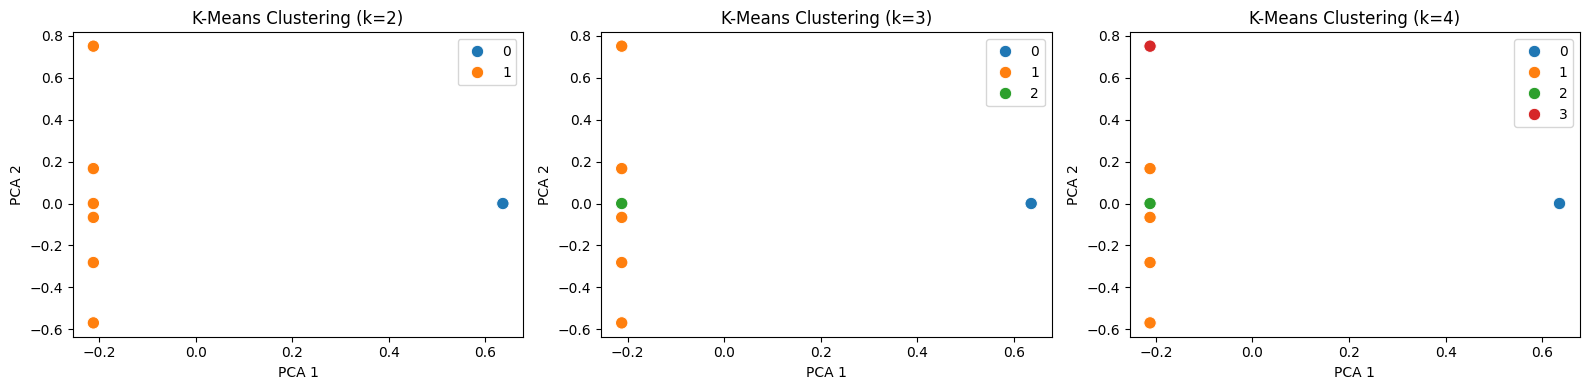

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Convert text corpus into TF-IDF feature matrix
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(df['text'])

print("TF-IDF matrix shape:", X_tfidf.shape)

# Apply K-Means
k_values = [2, 3, 4]
cluster_results = {}

for k in k_values:
    kmeans_model  = KMeans(n_clusters=k, random_state=42, n_init=10) #Initialize K-Means with fixed random seed
    kmeans_model .fit(X_tfidf) # Train clustering model on TF-IDF data
    cluster_results[k] = kmeans_model .labels_
    print(f"\nK={k} cluster assignments:")
    for i, label in enumerate(kmeans_model .labels_):
        print(f"Doc {i}: Cluster {label}")

#Reduce dimensionality for visualization
pca_model  = PCA(n_components=2, random_state=42)
tfidf_pca  = pca_model .fit_transform(X_tfidf.toarray())

#Plot clusters for each value of k
plot_figure, plot_axes  = plt.subplots(1, 3, figsize=(16, 4))
for axis, k in zip(plot_axes , k_values):
    sns.scatterplot(x=tfidf_pca [:, 0], y=tfidf_pca [:, 1],
                    hue=cluster_results[k], palette='tab10', ax=axis, s=80)
    axis.set_title(f"K-Means Clustering (k={k})")
    axis.set_xlabel("PCA 1"); axis.set_ylabel("PCA 2")
plt.tight_layout()
plt.show()

## The TF-IDF representation shows that documents are highly similar in their vocabulary patterns.
## k = 2 or 3 provides a more interpretable grouping, methods like the elbow method or silhouette score could be used to determine the optimal value of k.


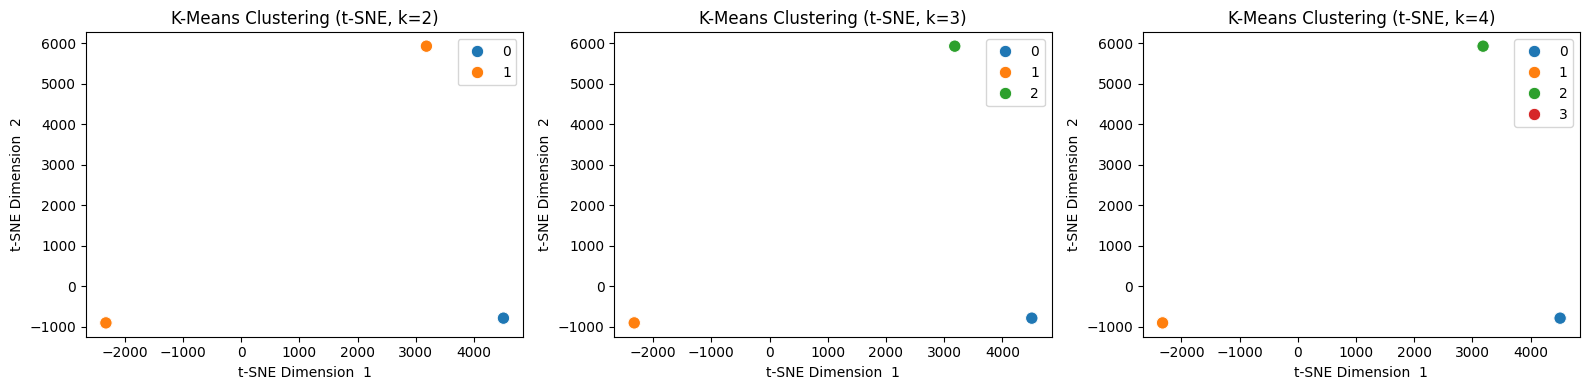

In [20]:
##t-SNE Visualization of K-Means Clusters
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


# Apply t-SNE to reduce TF-IDF vectors into 2D space
tsne_model  = TSNE(n_components=2, perplexity=5, learning_rate=200, random_state=42, init='pca')
tsne_result  = tsne_model .fit_transform(tfidf_matrix.toarray())

plot_figure, plot_axes  = plt.subplots(1, 3, figsize=(16, 4))
for axis, k in zip(plot_axes , k_values):
    sns.scatterplot(
        x=tsne_result [:, 0], y=tsne_result [:, 1],
        hue=cluster_results[k], palette='tab10', s=80, ax=axis
    )
    axis.set_title(f"K-Means Clustering (t-SNE, k={k})")
    axis.set_xlabel("t-SNE Dimension  1")
    axis.set_ylabel("t-SNE Dimension  2")

plt.tight_layout()
plt.show()

## Both PCA and t-SNE show a small number of clusters (k = 2 or 3) best represents the data structure.
## t-SNE highlights stronger separation between outliers and main groups, These results confirm that most documents are similar in word usage, with only a few standing out as unique.


In [18]:
import numpy as np
from sklearn.cluster import KMeans

def print_top_terms_per_cluster(tfidf_vectorizer, kmeans_model, n_terms=5):
    vocab_terms = np.array(tfidf_vectorizer.get_feature_names_out())

    # For each cluster, sort feature weights (centroid) descending
    order_centroids = kmeans_model.cluster_centers_.argsort(axis=1)[:, ::-1]

    n_terms = min(n_terms, vocab_terms.size)

    for cluster_idx in range(kmeans_model.n_clusters):
        top_feature_idxs = order_centroids[cluster_idx, :n_terms]
        top_terms = vocab_terms[top_feature_idxs]
        print(f"Cluster {cluster_idx}: {', '.join(top_terms)}")


for k in [2, 3, 4]:
    print(f"\nTop keywords for k={k}:")
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(tfidf_matrix)
    print_top_terms_per_cluster(tfidf_vectorizer, kmeans_model, n_terms=5)



Top keywords for k=2:
Cluster 0: ai, use, startups, translates, researchers
Cluster 1: warn, unusual, star, projects, prices

Top keywords for k=3:
Cluster 0: ai, use, startups, translates, researchers
Cluster 1: warn, unusual, star, projects, prices
Cluster 2: team, uae, prepares, match, month

Top keywords for k=4:
Cluster 0: ai, use, startups, translates, researchers
Cluster 1: warn, unusual, star, projects, prices
Cluster 2: team, uae, prepares, match, month
Cluster 3: steady, slowing, signs, rates, holds


## Discussion
**Compare retrieval results using BoW vs. TF-IDF**  
- BoW produced clusters that were broader and less precise, while TF-IDF better separated documents by their semantic themes (e.g., sports, technology, or science).

**How does changing k affect clustering structure?**  
- With small k (e.g., 2), clusters are large and merge different topics together for example sports and technology in one cluster.

- Increasing k to 3 or 4 creates smaller, more specific clusters — for instance, one for sports, one for technology, and one for health.
However, if k becomes too large relative to the dataset size, clusters may start to overlap or contain very few documents.


**Why is clustering unsupervised learning?**  
- It operates without predefined labels or target values. In this case, K-Means grouped documents that share similar TF-IDF representations, revealing underlying topical relationships without any human provided labels.



##Q3 - Classification

##PART 1: Linear Classifier with Two Features

In [1]:
import numpy as np
import pandas as pd

Train = {
    "awesome": [1, 3, 0, 0, 2, 4, 0, 1],
    "awful":   [0, 0, 2, 4, 1, 0, 3, 2],
    "sentiment": [1, 1, 0, 0, 1, 1, 0, 0]  # 1 = positive, 0 = negative
}

df = pd.DataFrame(Train)
print(df)


   awesome  awful  sentiment
0        1      0          1
1        3      0          1
2        0      2          0
3        0      4          0
4        2      1          1
5        4      0          1
6        0      3          0
7        1      2          0


## Linear classifier definition
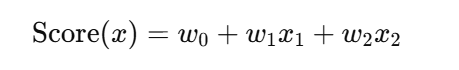

In [2]:
from sklearn.linear_model import LogisticRegression

# Features (awesome, awful)
X = df[["awesome", "awful"]].values
y = df["sentiment"].values

model = LogisticRegression()
model.fit(X, y)

# Extract weights
w0 = model.intercept_[0]
w1, w2 = model.coef_[0]
print(f"w0 = {w0:.3f},  w1 = {w1:.3f},  w2 = {w2:.3f}")

# Implement score function
def linear_score(x1, x2, w0, w1, w2):
    """Score(x) = w0 + w1*x1 + w2*x2"""
    return w0 + w1 * x1 + w2 * x2

# Compute score for each training example
df["score"] = linear_score(df["awesome"], df["awful"], w0, w1, w2)
df["pred_linear"] = (df["score"] > 0).astype(int)
print(df[["awesome", "awful", "sentiment", "score", "pred_linear"]].head())



w0 = 0.496,  w1 = 0.753,  w2 = -1.022
   awesome  awful  sentiment     score  pred_linear
0        1      0          1  1.248998            1
1        3      0          1  2.755377            1
2        0      2          0 -1.547566            0
3        0      4          0 -3.590941            0
4        2      1          1  0.980500            1


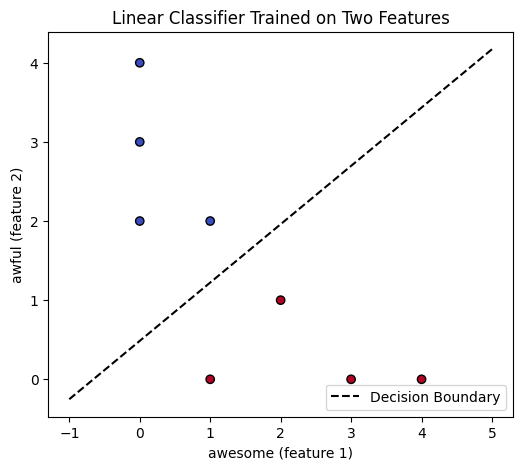

In [3]:
# Equation of decision boundary:
# 0 = w0 + w1*x1 + w2*x2  →  x2 = -(w1/w2)*x1 - (w0/w2)
import matplotlib.pyplot as plt
x1 = np.linspace(-1, 5, 100)
x2 = -(w1/w2) * x1 - (w0/w2)

plt.figure(figsize=(6,5))
plt.scatter(df["awesome"], df["awful"], c=y, cmap='coolwarm', edgecolor='k')
plt.plot(x1, x2, 'k--', label='Decision Boundary')
plt.xlabel("awesome (feature 1)")
plt.ylabel("awful (feature 2)")
plt.legend()
plt.title("Linear Classifier Trained on Two Features")
plt.show()

# showing how the classifier separates positive (red) and negative (blue)
# The dashed black line represents the decision boundary where the model’s score = 0.


##Plot classification regions


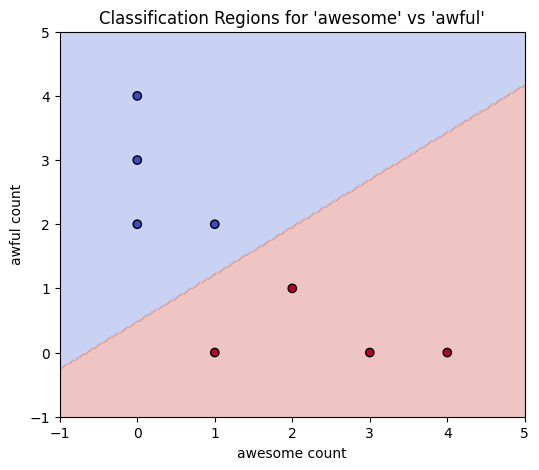

In [4]:
#build two 2D arrays:
# X_grid for x-axis (awesome counts)
# Y_grid for y-axis (awful counts)
# 200 evenly spaced values for 'awesome' & 200 evenly spaced values for 'awful'
X_grid, Y_grid = np.meshgrid(np.linspace(-1, 5, 200),
                     np.linspace(-1, 5, 200))

# For each grid point, I combined (x1, x2) into a single array
# The class (0 or 1) is predicted using the trained logistic regression model
# .ravel() flattens the 2D grid arrays into 1D before combining them.
Z_pred = model.predict(np.c_[X_grid.ravel(), Y_grid.ravel()]).reshape(X_grid.shape)

plt.figure(figsize=(6,5))
plt.contourf(X_grid, Y_grid, Z_pred, alpha=0.3, cmap='coolwarm')
plt.scatter(df["awesome"], df["awful"], c=y, edgecolor='k', cmap='coolwarm')
plt.title("Classification Regions for 'awesome' vs 'awful'")
plt.xlabel("awesome count")
plt.ylabel("awful count")
plt.show()
# background color shows the regions predicted as positive (red) or negative (blue)
#  red -> model predicts class 1 (positive)
#  blue -> model predicts class 0 (negative)


##PART 2: Logistic Regression on Synthetic Data

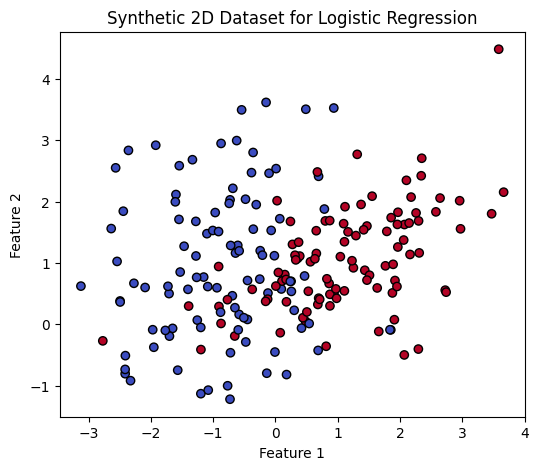

Trained parameters: w0=0.187, w1=1.818, w2=-0.409


In [5]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(
    n_samples=200,       # total number of samples
    n_features=2,        # two features for 2D visualization
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Synthetic 2D Dataset for Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Train a logistic regression model
Train_model = LogisticRegression()
Train_model.fit(X, y)


w0 = Train_model.intercept_[0]
w1, w2 = Train_model.coef_[0]
print(f"Trained parameters: w0={w0:.3f}, w1={w1:.3f}, w2={w2:.3f}")

# Description:
# The scatter plot shows an automatically generated 2D dataset.
# Each point represents one sample with two features.
# Red and blue colors correspond to the two classes to be separated.

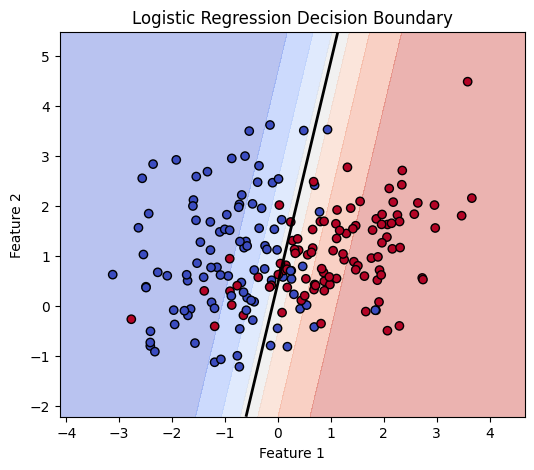

In [6]:
# Create a mesh grid for visualization
X_grid, Y_grid = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
)

# Predict probability of class 1 (positive) for each grid point
Z_pred = Train_model.predict_proba(np.c_[X_grid.ravel(), Y_grid.ravel()])[:,1]
Z_pred = Z_pred.reshape(X_grid.shape)

# Plot the classification regions
plt.figure(figsize=(6,5))
plt.contourf(X_grid, Y_grid, Z_pred, cmap='coolwarm', alpha=0.4)
plt.contour(X_grid, Y_grid, Z_pred, levels=[0.5], colors='k', linewidths=2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Description:
# The shaded regions visualize the predicted probability of class 1.
# The black line is the decision boundary.

##  Discussion
**How does feature scaling affect the boundary?**  
In the logistic regression using word counts (“awesome” and “awful”), the two features can have very different numeric ranges depending on how often each word appears. Without scaling, the model gives more weight to the smaller-range feature to balance the larger numbers from the other feature, which tilts or shifts the decision boundary.
After normalization, both features contribute equally, so the separating line becomes more accurate and balanced.

**What happens when data is not linearly separable?**  
If the data points cannot be separated by a straight line -- for example, if “awesome” and “awful” words overlap in sentiment, logistic regression still finds the best possible straight line that minimizes classification error.
However, many points will fall on the wrong side of the boundary.

**Compare geometric meaning of boundaries in regression vs. classification**  
In the regression task, the goal was to fit a continuous trend line minimizing squared error. In classification, the goal changes --> fit a decision boundary that separates two categories.

In linear regression, the line represents an estimated numeric output. In logistic regression, the same linear combination is passed through a sigmoid function, turning it into probabilities and defining a boundary between classes.
Thus, geometrically, both use straight lines, but their meanings differ —-> one predicts values, the other predicts classes.

